# Fandango Ratings Analysis

In 2015, Walt Hickey analyzed movie ratings data from rating aggregate site and ticket seller, [Fandango.com](http://www.fandango.com). Through his analysis, he discovered that the overall rating displayed to users was consistently higher than the actual aggregated score, and that Fandango almost always rounded up to the nearest half-star (and sometimes one full star). As Fandango has a direct stake in movies being rated higher (because it the site also sells tickets), these findings suggest some shady operaions behind the scenes at Fandango. You can read Hickey's full article [here](https://fivethirtyeight.com/features/fandango-movies-ratings/) to provide more context.

In this analysis we will examine Fandango's data once again to determine if their practices have changed since Walt Hickey's article, or if they are still inflating reviews.  To do this we will look at Hickey's data set from 2015, which he has made available on FiveThirtyEight's [Github](https://github.com/fivethirtyeight/data/tree/master/fandango) and compare it to a second data set from 2016 and 2017 obtained by author and Dataquest teacher Alex Olteanu, which he has also made available [here](https://github.com/mircealex/Movie_ratings_2016_17).  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read in the data sets and examine them
fandango_scores = pd.read_csv('fandango_score_comparison.csv')
scores_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
scores_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
#isolate the relevant columns in Hickey's data set
fandango_scores = fandango_scores[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                                  'Fandango_votes', 'Fandango_Difference']]

#isolate the relevant columns in the 2016-2017 data set
scores_16_17 = scores_16_17[['movie', 'year', 'fandango']]

In [5]:
fandango_scores.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
scores_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Is This Data What We Need?

Looking at the criteria used by both Hickey and Olteanu, we run immediately run into to some sampling problems. 

Hickey chose to only include movies with at least 30 user ratings (at the time of sampling) and he only chose movies that had tickets on sale in 2015. While this was fine for his analysis, it's impossible to say that this sample is representative of the overall population. Specifically, because it only includes movies from 2015, it introduces the possibility of a temporal trend - in this case, that the movies from 2015 were particularly good compared to any other year.

Olteanu's data set falls prey to the same problem, leaving us with two choices. Either we gather more data to provide a better sample of the population or we limit our initial goal to the available data. As it would be nearly impossible to gather more data as it would have been at the time of Hickey's article, we will limit our comparison only to popular movies of 2015 and popular movies of 2016.  



## Defining Popular Movies

To move forward, we will define popular movies using Walt Hickey's benchmark of at least 30 fan ratings. And, of course, we will be limiting our data only to ratings found on Fandango.  

Unfortunately, our second data set does not contain the number of fan ratings a movie has received, so to get an idea of whether it is representative of popular movies (as previously defined), we'll do a simple random sampling and check the number of fan ratings on Fandango.com. Then we'll double check the original data set to make sure it contains popular movies, as well. 

In [7]:
#sample 20 random movies from the original data set
scores_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [8]:
fandango_scores.sample(10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


Each of the movies in both samples has more than 30 fan ratings, so we can assume with some confidence that our data sets are representative of popular movies and move forward. The next step is to isolate movies in Hickey's set from 2015 and movies in Olteanu's data set from 2016 so we can compare the two.  

In [9]:
#create a new column with the year extracted from the FILM column
fandango_scores['year'] = fandango_scores['FILM'].str[-5:-1]

In [10]:
#isolate the movies released in 2015
movies_2015 = fandango_scores[fandango_scores['year'] == '2015']

In [11]:
movies_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
#isolate the movies released in 2016
movies_2016 = scores_16_17[scores_16_17['year'] == 2016]

In [13]:
movies_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Distributions

To quickly get a sense of the difference in ratings between 2015 and 2016 (if any), we'll first look at the shape of the distributions of ratings.

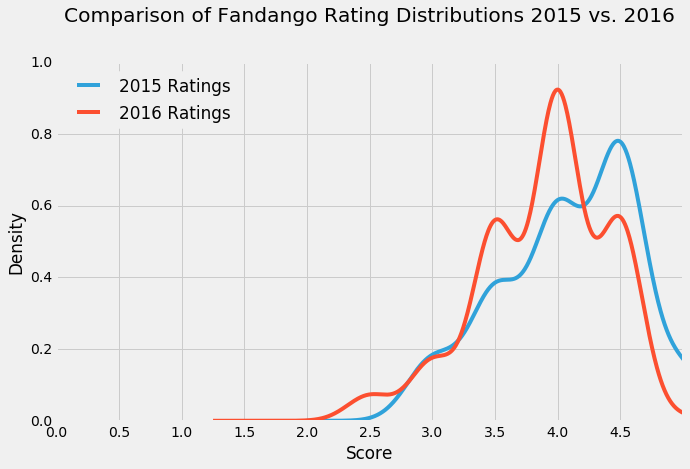

In [14]:
#create KDE plots of the two ratings columns
plt.style.use('fivethirtyeight')
movies_2015['Fandango_Stars'].plot.kde(label = '2015 Ratings', legend = True, figsize=(10,6))
movies_2016['fandango'].plot.kde(label = '2016 Ratings', legend = True)
plt.title('Comparison of Fandango Rating Distributions 2015 vs. 2016', y=1.10)
plt.xlabel('Score')
#limit the x axis to five, Fandango's top score
plt.xlim(0,5)
plt.xticks(np.arange(0,5, step = 0.5))
plt.show()

## KDE Results  
We can immediately see that both distributions are left skewed, with most movies being rated at three stars or above. However, there is also clear difference between the two years, with movies from 2016 being rated slightly lower on average. Since there are a difference number of movies between the two data sets, we'll next look at relative frequencies to see if the results are confirmed.  

In [15]:
print('2015 Ratings')
print(movies_2015['Fandango_Stars'].value_counts(normalize=True) * 100)
print('\n-----------\n')
print('2016 Ratings')
print(movies_2016['fandango'].value_counts(normalize=True) * 100)

2015 Ratings
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

-----------

2016 Ratings
4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64


Looking at the distribution tables confirms the results of the KDE plot. In 2015, nearly seven percent of movies had perfect scores while in 2016, 5 star ratings accounted for less than one percent of all scores. Similarly, 4.5 star ratings dropped from 37% to 24%, while 3.5 and 4.0 scores increased from about 18% and 28% to 24% and 40%, respectively. 

## Summary Statistics

Next, we'll plot the mean, median and mode of each set of movie ratings to see how they measure up.

In [17]:
#calculate means
mean_2015 = movies_2015['Fandango_Stars'].mean()
mean_2016 = movies_2016['fandango'].mean()

#calculate modes
mode_2015 = movies_2015['Fandango_Stars'].mode()[0]
mode_2016 = movies_2016['fandango'].mode()[0]

#calculate median
median_2015 = movies_2015['Fandango_Stars'].median()
median_2016 = movies_2016['fandango'].median()

#create a new dataframe to store the summary statistics
summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats.index = ['mean', 'median', 'mode']


In [18]:
summary_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


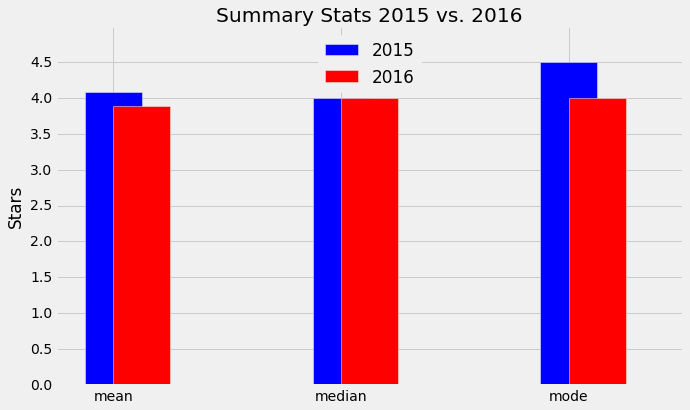

In [31]:
#plot the summary stats using fivethirtyeight's style
plt.style.use('fivethirtyeight')

#plot the stats in a grouped bar chart
summary_stats['2015'].plot.bar(label='2015', legend=True, figsize = (10,6),
                              color='blue', align='center', width=0.25)
summary_stats['2016'].plot.bar(label='2016', legend=True,
                              color='red', align='edge', width=0.25,
                              rot=0)
plt.ylabel('Stars')
plt.ylim(0,5)
plt.yticks(np.arange(0,5,step=0.5))
plt.title('Summary Stats 2015 vs. 2016')

plt.show()

## Summary

Although there wasn't a huge difference, Fandango's average score did drop.  From the relative frequencies, we can see that there were more scores in the 3.5-4.5 range and fewer in the 4.5-5.0 range.  Looking at the mean and mode, the scores were lower on average in 2016, and the most frequent scores tended to be lower in 2016. Although we can't say for sure that Hickey's article had an effect on Fandango's rating system, it seems clear that *some* change took place between 2015 and 2016.  